In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap.umap_ as umap
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,adjusted_rand_score
from sklearn.datasets import load_wine

In [3]:
df=load_wine()
X=df.data
y=df.target
x=pd.DataFrame(X,columns=df.feature_names)
x.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [4]:
X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y,test_size=0.2,random_state=42)

In [27]:
boost_model=RandomForestClassifier(n_estimators=100,random_state=42)
boost_model.fit(X_train,y_train)
y_pred=boost_model.predict(X_test)

print("Accuracy:",accuracy_score(y_test,y_pred))
print("Classification report:\n",classification_report(y_test,y_pred))

Accuracy: 1.0
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        10

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



In [6]:
boost_model=LogisticRegression(max_iter=1000)
boost_model.fit(X_train,y_train)
y_pred=boost_model.predict(X_test)

print("Accuracy:",accuracy_score(y_test,y_pred))
print("Classification report:\n",classification_report(y_test,y_pred))

Accuracy: 0.9722222222222222
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.93      1.00      0.97        14
           2       1.00      0.90      0.95        10

    accuracy                           0.97        36
   macro avg       0.98      0.97      0.97        36
weighted avg       0.97      0.97      0.97        36



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### SCALING THE DATA BEFORE PCA TRANSFORMATION TO GENERATE UNBIASED PCA COMPONENTS

In [7]:
scaler=StandardScaler()
x=scaler.fit_transform(X)

In [8]:
pca=PCA(n_components=2)
x_pca=pca.fit_transform(x)
x_train,x_test,y_train,y_test=train_test_split(x_pca,y,stratify=y,test_size=0.2,random_state=42)

In [9]:
pd.DataFrame(x_pca).head()

,0,1
0,3.316751,1.443463
1,2.209465,-0.333393
2,2.516740,1.031151
3,3.757066,2.756372
4,1.008908,0.869831


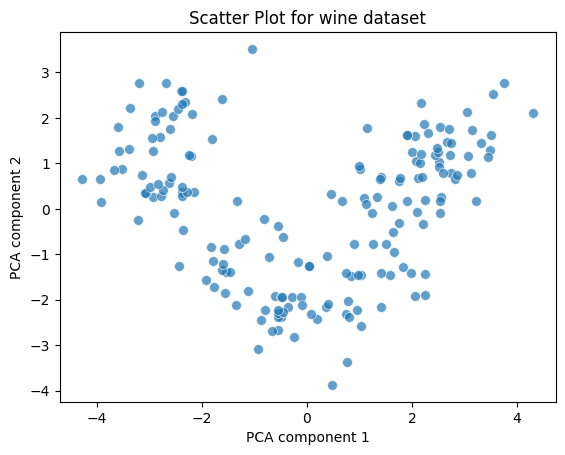

In [10]:
sns.scatterplot(x=x_pca[:,0],y=x_pca[:,1],s=50,alpha=0.7)
plt.xlabel("PCA component 1")
plt.ylabel("PCA component 2")
plt.title("Scatter Plot for wine dataset")
plt.show()

#### CHECKING FOR OPTIMAL VALUE OF K

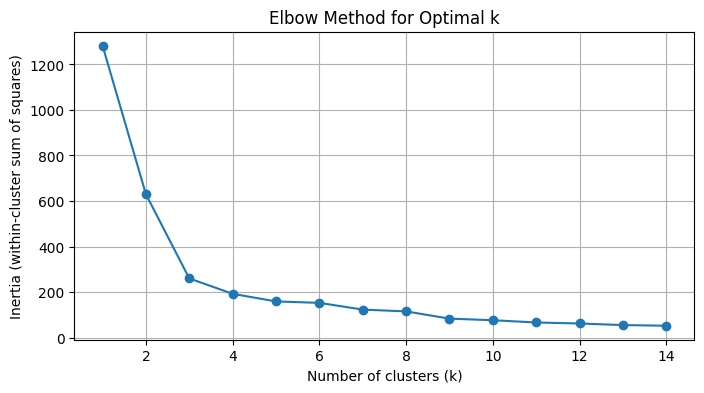

In [11]:
inertia = []
K = range(1, 15)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(x_pca)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(K, inertia, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia (within-cluster sum of squares)')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

##### K=3 IS THE OPTIMAL VALUE

THE OPTIMAL VALUE FOR K IN CASE OF KNNCLASSIFIER CAN ALSO BE CALCULATED USING THE ELBOW METHOD ('INVERSE' OF IT) AND CV_SCORES BEING THE PARAMETER

In [12]:
kmeans=KMeans(n_clusters=3,random_state=42)
kmeans.fit(x_pca)
clusters=kmeans.predict(x_pca)

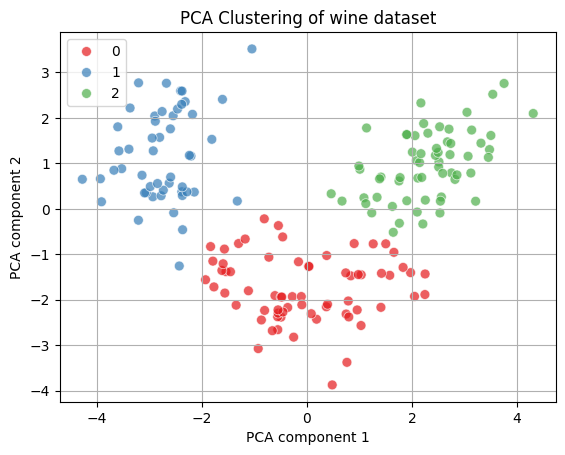

In [13]:
sns.scatterplot(x=x_pca[:,0],y=x_pca[:,1],s=50,alpha=0.7,hue=clusters,palette='Set1')
plt.xlabel("PCA component 1")
plt.ylabel("PCA component 2")
plt.grid(True)
plt.title("PCA Clustering of wine dataset")
plt.show()

#### PCA PRESERVES GLOBAL STRUCTURE AND HENCE THIS GRAPH SHOWS THAT
- CLASS 0 IS QUITE SIMILAR TO CLASS 1 AND 2
- CLASS 1 AND 2 ARE QUITE DIFFERENT AND HENCE ARE SITUATED APART

>  THESE ASSUMPTIONS MAY BE SLIGHTLY MISLEADING AS WE SEE ONLY 2 COMPONENTS FROM PCA


In [14]:
print(pca.explained_variance_ratio_)

[0.36198848 0.1920749 ]


#### PCA VARIANCE IS LITTLE LOW (36 +19 = 55%) ,THIS IMPLIES THAT THE DATA IN 3RD,4TH... COMPONENTS WAS CRUICIAL AND HENCE THE DATA IS LITTLE BIT MISLEADING

#### BECAUSE OF THIS THE CLUSTERS ARE NOT SEPARATED PROPERLY

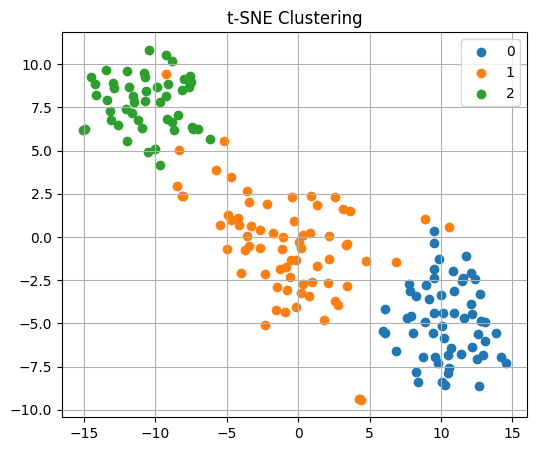

In [15]:
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne = tsne.fit_transform(x)


def plot_embedding(X_embedded, labels, title):
    plt.figure(figsize=(6, 5))
    for label in set(labels):
        idx = labels == label
        plt.scatter(X_embedded[idx, 0], X_embedded[idx, 1], label=label)
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

plot_embedding(X_tsne, y, "t-SNE Clustering")

##### T-SNE PRESERVE LOCAL STRUCTURE
- TIGHLTY PACKED LOCAL NEIGHBOURS
- CLEAR DISTINCTION OF CLUSTERS
- CLASS SEPARABILITY BETTER VISIBLE THAN PCA

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


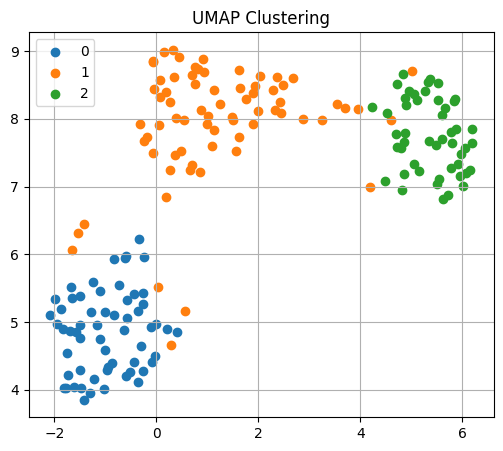

In [16]:
reducer = umap.UMAP(n_components=2, random_state=42,n_neighbors=30)
X_umap = reducer.fit_transform(x)

plot_embedding(X_umap, y, "UMAP Clustering")

#### UMAP PRESERVES BOTH LOCAL AND GLOBAL STRUCTURE
- TIGTHLY PACKED LOCALLY AND SEPARTATED GLOBALLY
- BETTER THAN PCA AND T-SNE

In [17]:
def evaluate_kmeans(X_reduced, name):
    kmeans = KMeans(n_clusters=3, random_state=42)
    preds = kmeans.fit_predict(X_reduced)
    ari = adjusted_rand_score(y, preds)
    print(f"{name} - Adjusted Rand Index (ARI): {ari:.3f}")

evaluate_kmeans(x_pca, "PCA")
evaluate_kmeans(X_tsne, "t-SNE")
evaluate_kmeans(X_umap, "UMAP")

PCA - Adjusted Rand Index (ARI): 0.896
t-SNE - Adjusted Rand Index (ARI): 0.788
UMAP - Adjusted Rand Index (ARI): 0.788


#### ARI SCORES TELL HOW WELL THE MODEL CLUSTERED THE DATA

> IT COMPARES THE REAL LABELS VS LABELS PROVIDED BY THE MODEL

> HIGHER ARI MEANS BETTER DECISION BOUNDARIES AS MODEL CLASSIFIES PROPERLY

> SINCE THE DATASET HAS SMALL DIMENSIONS AND WELL STRUCTURED PCA OUTPERFORMS

In [18]:
def classify_on_embedding(X_reduced, name):
    X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.3, random_state=42, stratify=y)
    clf = LogisticRegression(max_iter=1000)
    clf.fit(X_train, y_train)
    preds = clf.predict(X_test)
    print(f"\nClassification on {name} embedding:")
    print(classification_report(y_test, preds))

classify_on_embedding(X_tsne, "t-SNE")
classify_on_embedding(x_pca, "PCA")
classify_on_embedding(X_umap, "UMAP")


Classification on t-SNE embedding:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        18
           1       0.90      0.90      0.90        21
           2       0.93      0.93      0.93        15

    accuracy                           0.93        54
   macro avg       0.93      0.93      0.93        54
weighted avg       0.93      0.93      0.93        54


Classification on PCA embedding:
              precision    recall  f1-score   support

           0       0.94      0.89      0.91        18
           1       0.87      0.95      0.91        21
           2       1.00      0.93      0.97        15

    accuracy                           0.93        54
   macro avg       0.94      0.92      0.93        54
weighted avg       0.93      0.93      0.93        54


Classification on UMAP embedding:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        18
           1       1.00 

#### MODEL PERFORMED CLASSIFICATION WELL ON T-SNE AND UMAP REDUCED DATA

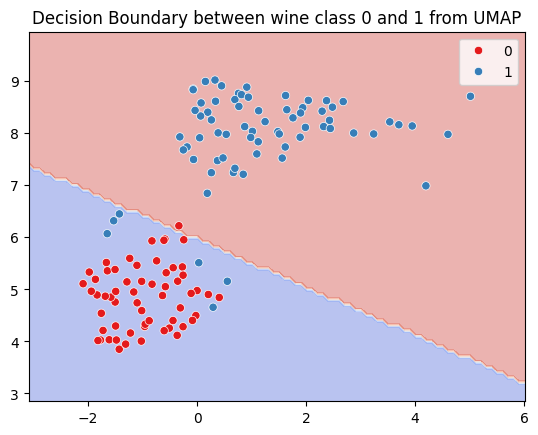

In [39]:
mask = (y == 0) | (y == 1)
X_2class = X_umap[mask]
y_2class = y[mask]

X_2class_pca = X_2class

model = LogisticRegression(max_iter=1000)
# model=RandomForestClassifier(n_estimators=100,random_state=42)
# model=SVC(kernel='rbf')
model.fit(X_2class_pca, y_2class)

h = .1
x_min, x_max = X_2class_pca[:, 0].min() - 1, X_2class_pca[:, 0].max() + 1
y_min, y_max = X_2class_pca[:, 1].min() - 1, X_2class_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.coolwarm)
sns.scatterplot(x=X_2class_pca[:, 0], y=X_2class_pca[:, 1], hue=y_2class, palette='Set1')
# plot_decision_regions(X_2class_pca,y_2class,clf=model,legend=2)
plt.title("Decision Boundary between wine class 0 and 1 from UMAP")
plt.show()


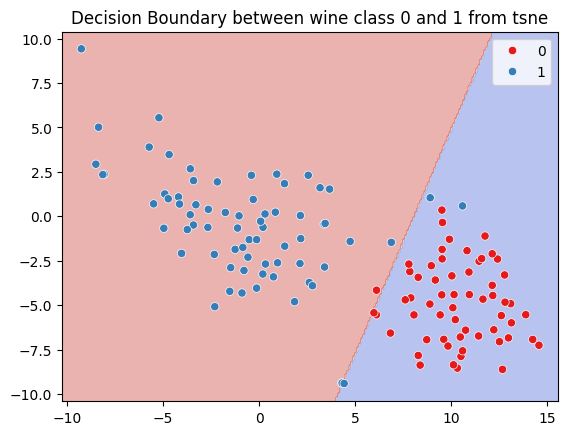

In [37]:
mask = (y == 0) | (y == 1)
X_2class = X_tsne[mask]
y_2class = y[mask]

X_2class_pca = X_2class

model = LogisticRegression(max_iter=1000)
# model=RandomForestClassifier(n_estimators=100,random_state=42)
# model=SVC(kernel='rbf')
model.fit(X_2class_pca, y_2class)

h = .1
x_min, x_max = X_2class_pca[:, 0].min() - 1, X_2class_pca[:, 0].max() + 1
y_min, y_max = X_2class_pca[:, 1].min() - 1, X_2class_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.coolwarm)
sns.scatterplot(x=X_2class_pca[:, 0], y=X_2class_pca[:, 1], hue=y_2class, palette='Set1')
# plot_decision_regions(X_2class_pca,y_2class,clf=model,legend=2)
plt.title("Decision Boundary between wine class 0 and 1 from tsne")
plt.show()


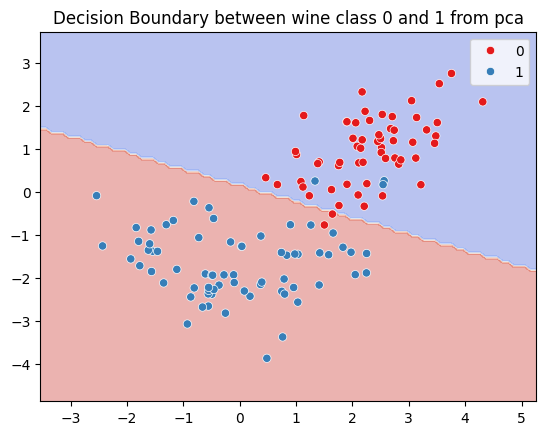

In [38]:
mask = (y == 0) | (y == 1)
X_2class = x_pca[mask]
y_2class = y[mask]

X_2class_pca = X_2class

model = LogisticRegression(max_iter=1000)
# model=RandomForestClassifier(n_estimators=100,random_state=42)
# model=SVC(kernel='rbf')
model.fit(X_2class_pca, y_2class)

h = .1
x_min, x_max = X_2class_pca[:, 0].min() - 1, X_2class_pca[:, 0].max() + 1
y_min, y_max = X_2class_pca[:, 1].min() - 1, X_2class_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.coolwarm)
sns.scatterplot(x=X_2class_pca[:, 0], y=X_2class_pca[:, 1], hue=y_2class, palette='Set1')
# plot_decision_regions(X_2class_pca,y_2class,clf=model,legend=2)
plt.title("Decision Boundary between wine class 0 and 1 from pca")
plt.show()


In [20]:
pd.Series(y).value_counts()

,count
1,71
0,59
2,48


#### ADDING THE CLUSTER COLUMN TO HELP THE MODEL

In [21]:
x=pd.DataFrame(x,columns=df.feature_names)
x['clusters']=pd.Series(clusters)
x['target']=pd.Series(y)
x.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,clusters,target
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009,2,0
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242,2,0
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148,2,0
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574,2,0
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874,2,0


In [22]:
X_train,X_test,y_train,y_test=train_test_split(x,y,stratify=y,test_size=0.2,random_state=42)

In [23]:
boost_model=GradientBoostingClassifier(n_estimators=100,random_state=42)
boost_model.fit(X_train,y_train)
y_pred=boost_model.predict(X_test)

print("Accuracy:",accuracy_score(y_test,y_pred))
print("Classification report:\n",classification_report(y_test,y_pred))

Accuracy: 0.9722222222222222
Classification report:
               precision    recall  f1-score   support

           0       1.00      0.92      0.96        12
           1       0.93      1.00      0.97        14
           2       1.00      1.00      1.00        10

    accuracy                           0.97        36
   macro avg       0.98      0.97      0.97        36
weighted avg       0.97      0.97      0.97        36



#### THUS ADDITION OF CLUSTER COLUMN INCREASED THE ACCURACY OF THE MODEL